<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/eye-mouth-detection/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from urllib.request import urlopen, urlretrieve
import matplotlib.pyplot as plt

In [2]:
def show_im(img):
    plt.figure(figsize = (8, 8))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
cascades_url = {
    "haarcascade_eye.xml": "https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/eye-mouth-detection/res/haarcascade_eye.xml",
    "haarcascade_frontalface_default.xml": "https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/eye-mouth-detection/res/haarcascade_frontalface_default.xml",
    "haarcascade_smile.xml": "https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/eye-mouth-detection/res/haarcascade_smile.xml"
}

In [4]:
for path, url in cascades_url.items():
    urlretrieve(url, path)

In [5]:
cascades = {}
names = ["eye", "face", "smile"]
for i, url in enumerate(cascades_url.keys()):
    cascades[names[i]] = cv2.CascadeClassifier(url)

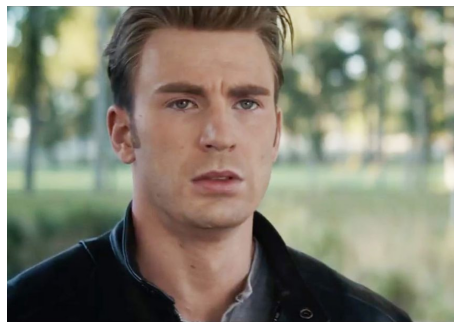

In [6]:
req = urlopen("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/face_swap/res/steve_rogers.jpg")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
face_im = cv2.imdecode(arr, -1)

show_im(face_im)

In [7]:
gray = cv2.cvtColor(face_im, cv2.COLOR_BGR2GRAY)
faces = cascades["face"].detectMultiScale(gray, 1.3, 5)

In [8]:
result = face_im.copy()

for face_box in faces:
    (x, y, w, h) = face_box

    cv2.rectangle(result, (x, y) ,(x+w, y+h), (255, 0, 0), 4)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = result[y:y+h, x:x+w]
    
    eyes = cascades["eye"].detectMultiScale(roi_gray, 1.2, 4)
    for eye_box in eyes:
        (ex, ey, ew, eh) = eye_box
        cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh),(255, 0, 0), 4)

    smiles = cascades["smile"].detectMultiScale(roi_gray, 1.2, 6)
    for smile_box in smiles:
        (sx, sy, sw, sh) = smile_box
        cv2.rectangle(roi_color, (sx, sy),(sx+sw, sy+sh),(255, 0, 0), 4)

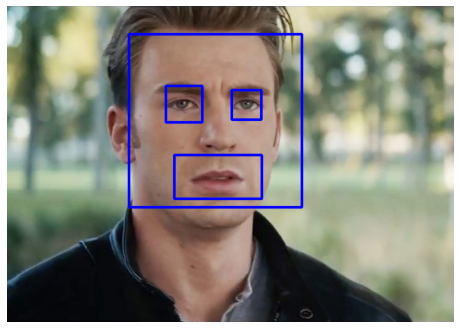

In [9]:
show_im(result)